# Reading PROBA-V data from R 
This notebook illustrates how to find locations of PROBA-V data, and reads them using the preinstalled R raster package.
No further processing is carried out.
We use the 'reticulate' R library to access a Python library that supports finding locations of PROBA-V products on the MEP. Reusing this Python library ensures that R users can also benefit from everything that is implemented for Python users.

Load the reticulate library (R-Python bridge) and point it to the Python version that comes preconfigured with all modules.

In [2]:
library(reticulate) #update to Proba V C2 dataset and services (opensearch catalouge), 
library(raster)

Use reticulate calls to load our 'catalogclient' library, written in Python.
More information about the catalog service for PROBA-V product lookup can be found here:
https://proba-v-mep.esa.int/documentation/manuals/product-catalog-api
Using the catalog API avoids having to write our own file lookup code.

In [3]:
catalogclient <- import("terracatalogueclient")
rasterio <- import("rasterio")
dt <- import("datetime")

In [4]:
cat=catalogclient$Catalogue

In [5]:
collections_list <- cat()$get_collections()

In [6]:
collections <- iterate(collections_list)

In [7]:
print(paste0("number of collections are: ", length(collections)))

[1] "number of collections are: 105"


## select specific type of products and check the same

In [8]:
collections_proba <- cat()$get_collections(platform="PROBA-V")
collections <- iterate(collections_proba)
print(paste0("number of collections are: ", length(collections)))

print("and they are are: ")
for(i in collections)
  {print(i)}

[1] "number of collections are: 35"
[1] "and they are are: "
urn:eop:VITO:PROBAV_L1C_HDF_V2
urn:eop:VITO:PROBAV_L2A_100M_COG_V2
urn:eop:VITO:PROBAV_L2A_100M_HDF_V2
urn:eop:VITO:PROBAV_L2A_1KM_COG_V2
urn:eop:VITO:PROBAV_L2A_1KM_HDF_V2
urn:eop:VITO:PROBAV_L2A_333M_COG_V2
urn:eop:VITO:PROBAV_L2A_333M_HDF_V2
urn:eop:VITO:PROBAV_S10_TOC_1KM_COG_V2
urn:eop:VITO:PROBAV_S10_TOC_1KM_HDF_V2
urn:eop:VITO:PROBAV_S10_TOC_333M_COG_V2
urn:eop:VITO:PROBAV_S10_TOC_333M_HDF_V2
urn:eop:VITO:PROBAV_S10_TOC_NDVI_1KM_COG_V2
urn:eop:VITO:PROBAV_S10_TOC_NDVI_1KM_HDF_V2
urn:eop:VITO:PROBAV_S10_TOC_NDVI_333M_COG_V2
urn:eop:VITO:PROBAV_S10_TOC_NDVI_333M_HDF_V2
urn:eop:VITO:PROBAV_S1_TOA_100M_COG_V2
urn:eop:VITO:PROBAV_S1_TOA_100M_HDF_V2
urn:eop:VITO:PROBAV_S1_TOA_1KM_COG_V2
urn:eop:VITO:PROBAV_S1_TOA_1KM_HDF_V2
urn:eop:VITO:PROBAV_S1_TOA_333M_COG_V2
urn:eop:VITO:PROBAV_S1_TOA_333M_HDF_V2
urn:eop:VITO:PROBAV_S1_TOC_100M_COG_V2
urn:eop:VITO:PROBAV_S1_TOC_100M_HDF_V2
urn:eop:VITO:PROBAV_S1_TOC_1KM_COG_V2
urn:eop:VI

## count number of specific type of product

In [10]:
cat()$get_product_count(collection="urn:eop:VITO:PROBAV_S10_TOC_NDVI_333M_HDF_V2")

[1] 91328

In [11]:
collection   = 'urn:eop:VITO:PROBAV_S10_TOC_NDVI_333M_COG_V2' # choose any product type in the lists we made earlier
startDate    = "2017-04-20"
endDate      = "2018-04-20"
minLatitude  = 51 #in decimal degrees, positive for North
maxLatitude  = 52
minLongitude = 4 #in decimal degrees, positive for East
maxLongitude = 5

products = cat()$get_products(collection,startDate, endDate,
                                  bbox=c(minLongitude, minLatitude, maxLongitude, maxLatitude),
                                  cloudCover="[10,20[",
                                  accessedFrom="MEP")

products_list <- iterate(products)
print(paste0("number of products are: ", length(products_list)))

print("and they are are: ")
for(i in products_list)
  {print(i$title)}

[1] "number of products are: 6"
[1] "and they are are: "
[1] "PROBAV_S10_TOC_NDVI_X18Y02_20170911_333M_V201"
[1] "PROBAV_S10_TOC_NDVI_X18Y02_20171001_333M_V201"
[1] "PROBAV_S10_TOC_NDVI_X18Y02_20171111_333M_V201"
[1] "PROBAV_S10_TOC_NDVI_X18Y02_20171121_333M_V201"
[1] "PROBAV_S10_TOC_NDVI_X18Y02_20180301_333M_V201"
[1] "PROBAV_S10_TOC_NDVI_X18Y02_20180311_333M_V201"


In [12]:
ndvi_files = lapply(products_list,function(p) p$data)
str(ndvi_files[1])

List of 1
 $ :List of 2
  ..$ :file:///data/MTDA/PROBAV_C2/COG/PROBAV_L3_S10_TOC_NDVI_333M/2017/20170911/PROBAV_S10_TOC_NDVI_20170911_333M_V201/PROBAV_S10_TOC_NDVI_X18Y02_20170911_333M_NDVI_V201.TIFF
  ..$ :file:///data/MTDA/PROBAV_C2/COG/PROBAV_L3_S10_TOC_NDVI_333M/2017/20170911/PROBAV_S10_TOC_NDVI_20170911_333M_V201/PROBAV_S10_TOC_NDVI_X18Y02_20170911_333M_SM_V201.TIFF


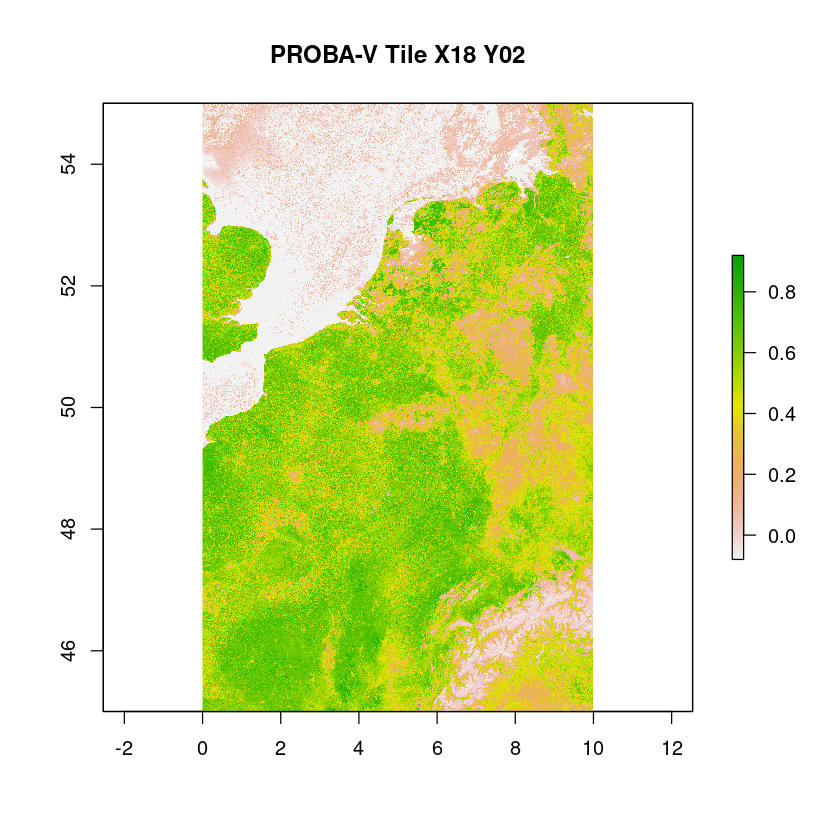

In [13]:
path=toString(ndvi_files[[4]][[1]]) #select 4th item in list to plot

r <- raster(substring(path,8))#
plot(r, main='PROBA-V Tile X18 Y02')